In [129]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.neural_network import MLPClassifier
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
# read the csv file
df = pd.read_csv('weatherAUS.csv')
df.shape

(145460, 23)

In [131]:
# preprocessing

# print(df['WindGustDir'].value_counts())

df = df.drop(columns = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

# print(df.info)

# for the columns with NaN values replace them with the mean
for col in df.columns:
    if df[col].dtype != 'object':
        df[col].fillna(value = df[col].mean(), inplace = True)

# print(df.info)

In [132]:
# replace yes and no with 0 or 1 and drop all rows which contain a null value.
df.RainToday.replace(('Yes', 'No'), (1, 0), inplace=True)
df.RainTomorrow.replace(('Yes', 'No'), (1, 0), inplace=True)
df = df[df['RainToday'].notna()]
df = df[df['RainTomorrow'].notna()]
# print(df.info())
# print(df.isna().sum())

<AxesSubplot:>

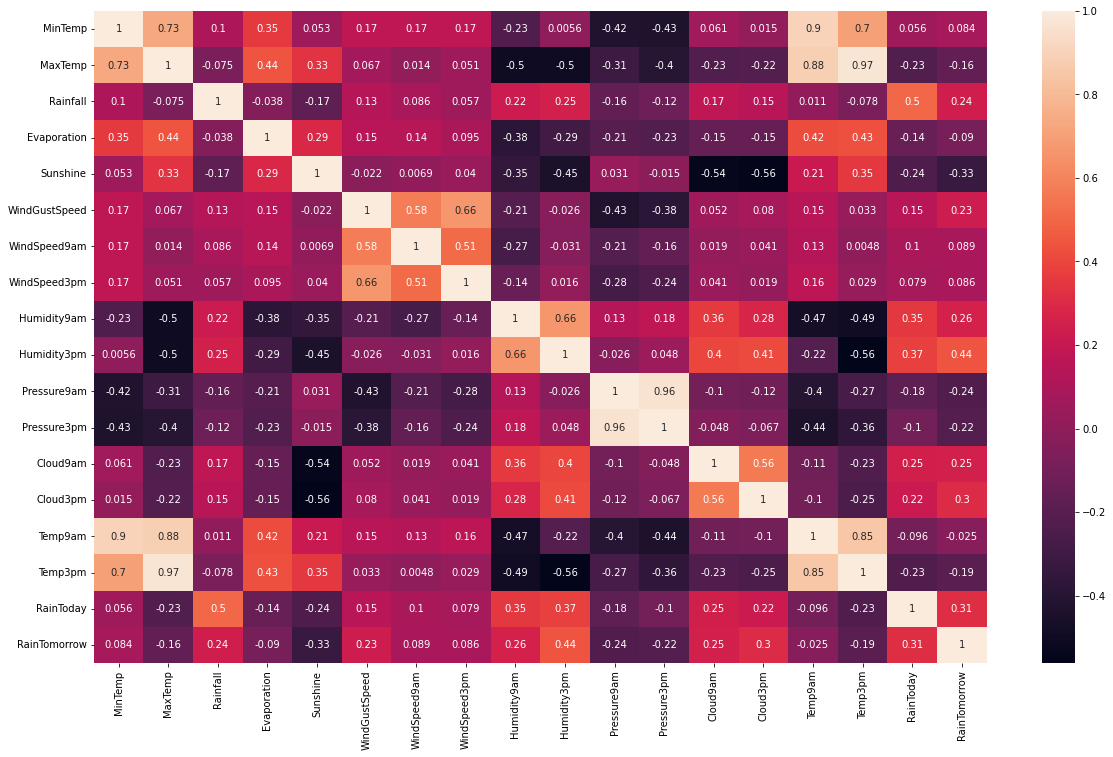

In [133]:
cor = df.corr()
plt.figure(figsize = (20, 12))
sns.heatmap(cor, annot = True)

In [134]:
related = cor['RainTomorrow'].sort_values(ascending = False)
print(related)

RainTomorrow     1.000000
Humidity3pm      0.441541
RainToday        0.313097
Cloud3pm         0.303381
Humidity9am      0.256052
Cloud9am         0.254208
Rainfall         0.239032
WindGustSpeed    0.225622
WindSpeed9am     0.089463
WindSpeed3pm     0.085906
MinTemp          0.084179
Temp9am         -0.025371
Evaporation     -0.089966
MaxTemp         -0.159269
Temp3pm         -0.190702
Pressure3pm     -0.216805
Pressure9am     -0.235940
Sunshine        -0.328782
Name: RainTomorrow, dtype: float64


In [135]:
X = df.drop(columns = ['RainTomorrow']).to_numpy()
y = df['RainTomorrow'].to_numpy()
X.shape

(140787, 17)

In [136]:
X_scale = StandardScaler()
X = X_scale.fit_transform(X)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape
X_test.shape

(35197, 17)

In [138]:
def run_logistic_regression(Penalty, Solver, C_val, Max_iter):
    Logreg = LogisticRegression(penalty = Penalty, solver = Solver, C=C_val, max_iter = Max_iter)
    Logreg.fit(X_train, y_train)
    y_pred = Logreg.predict(X_test)
    acc_logreg_training = Logreg.score(X_train, y_train)
    acc_logreg_test = metrics.accuracy_score(y_test, y_pred)
    return acc_logreg_training, acc_logreg_test

In [139]:
C_val = [0.01, 0.1, 1, 10, 100, 1000]
high_accuracy = 0
vals = None
train_accuracy_l1, test_accuracy_l1 = [],[]
for val in C_val:
    train, test = run_logistic_regression("l1", "saga", val, 10000)
    train_accuracy_l1.append(train)
    test_accuracy_l1.append(test)
    if test > high_accuracy:
        high_accuracy = test
        vals = ("l1", val)
print(train_accuracy_l1)
print(test_accuracy_l1)


[0.8453357325504309, 0.8455251444265556, 0.8454304384884932, 0.845458850269912, 0.845458850269912, 0.8454493796761057]
[0.8435093900048299, 0.8438503281529676, 0.843793505128278, 0.8438219166406228, 0.8438219166406228, 0.8438219166406228]


In [140]:
train_accuracy_none, test_accuracy_none = [],[]
for val in C_val:
    train, test = run_logistic_regression("none", "saga", val, 10000)
    train_accuracy_none.append(train)
    test_accuracy_none.append(test)
    if test > high_accuracy:
        high_accuracy = test
        vals = ("none", val)
print(train_accuracy_none)
print(test_accuracy_none)

c:\Users\adity\Desktop\Football-Prediction-Algorithm\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\adity\Desktop\Football-Prediction-Algorithm\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\adity\Desktop\Football-Prediction-Algorithm\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\adity\Desktop\Football-Prediction-Algorithm\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\adity\Desktop\Football-Prediction-Algorithm\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will

[0.8454493796761057, 0.8454493796761057, 0.8454493796761057, 0.8454493796761057, 0.8454493796761057, 0.8454493796761057]
[0.8438219166406228, 0.8438219166406228, 0.8438219166406228, 0.8438219166406228, 0.8438219166406228, 0.8438219166406228]


In [141]:
train_accuracy_l2, test_accuracy_l2 = [],[]
for val in C_val:
    train, test = run_logistic_regression("l2", "saga", val, 10000)
    train_accuracy_l2.append(train)
    test_accuracy_l2.append(test)
    if test > high_accuracy:
        high_accuracy = test
        vals = ("l2", val)
print(train_accuracy_l2)
print(test_accuracy_l2)

[0.8452694383937873, 0.8455251444265556, 0.8454493796761057, 0.845458850269912, 0.8454493796761057, 0.8454493796761057]
[0.843793505128278, 0.843935562690002, 0.8438219166406228, 0.8438219166406228, 0.8438219166406228, 0.8438219166406228]


Text(0, 0.5, 'Accuracy')

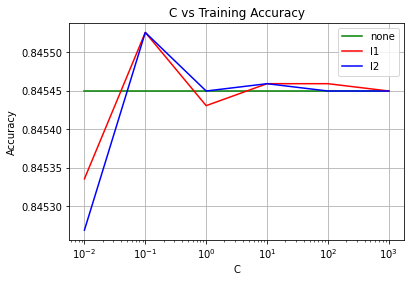

In [142]:
plt.plot(C_val, train_accuracy_none, color = 'g', label = 'none')
plt.plot(C_val, train_accuracy_l1, color = 'r', label = 'l1')
plt.plot(C_val, train_accuracy_l2, color = 'b', label = 'l2')
plt.xscale('log')
plt.grid()
plt.legend(loc='best')
plt.title('C vs Training Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')


Text(0, 0.5, 'Accuracy')

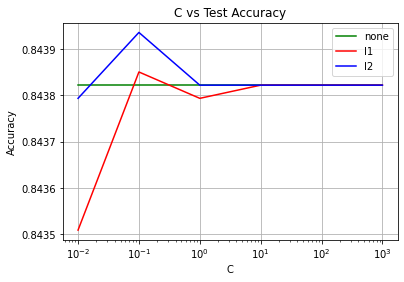

In [143]:
plt.plot(C_val, test_accuracy_none, color = 'g', label = 'none')
plt.plot(C_val, test_accuracy_l1, color = 'r', label = 'l1')
plt.plot(C_val, test_accuracy_l2, color = 'b', label = 'l2')
plt.xscale('log')
plt.grid()
plt.legend(loc='best')
plt.title('C vs Test Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')

In [144]:
print(high_accuracy, vals)

0.843935562690002 ('l2', 0.1)


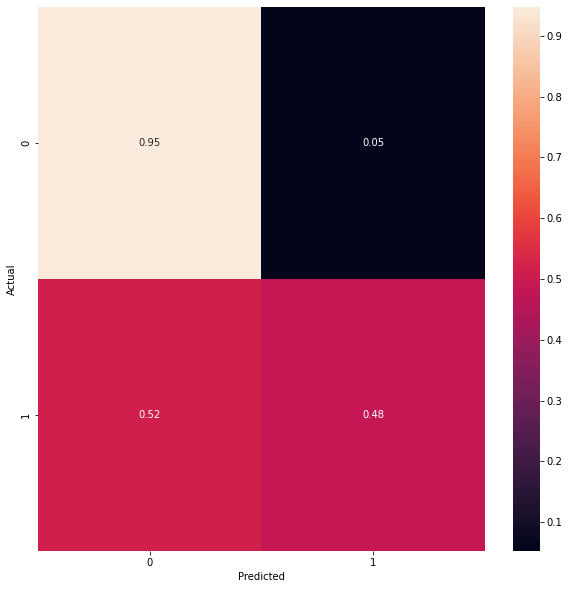

In [145]:
Logreg = LogisticRegression(penalty = "l2", solver = "saga", C=0.1, max_iter = 10000)
Logreg.fit(X_train, y_train)
y_pred = Logreg.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [146]:
for val in test_accuracy_none:
    print(val.round(6))

0.843822
0.843822
0.843822
0.843822
0.843822
0.843822
